You can find a link to the dataset we are using [here](https://huggingface.co/datasets/julien-c/titanic-survival).

# Data Exploration

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("hf://datasets/julien-c/titanic-survival/titanic.csv")

In [64]:
data

Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      male  22.0                        1                        0   7.2500  
1    female  38.0                        1                        0  71.2833  
2    female  26.0                        0                        0   7.9250  
3    female  35.0                        1                        0  53.1000  
4      male  35.0                        0                        0   8.0500  
..      ...   ...                      ...                      ...      ...  
882    male  27.0                        0                        0  13.0000  
883  female  19.0                        0                        0  30.0000  
884  female   7.0                        1                        2  23.4500  
885    male  26.0                        0                        0  30.0000  
886    male  32.0                        0                        0   7.7500  

[887 rows x 8 columns]

## Data Preprocessing

In [65]:
data = data.drop(columns = ['Name'])

In [66]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [67]:
data.describe().round(2)

Survived  Pclass     Sex     Age  Siblings/Spouses Aboard  \
count    887.00  887.00  887.00  887.00                   887.00   
mean       0.39    2.31    0.65   29.47                     0.53   
std        0.49    0.84    0.48   14.12                     1.10   
min        0.00    1.00    0.00    0.42                     0.00   
25%        0.00    2.00    0.00   20.25                     0.00   
50%        0.00    3.00    1.00   28.00                     0.00   
75%        1.00    3.00    1.00   38.00                     1.00   
max        1.00    3.00    1.00   80.00                     8.00   

       Parents/Children Aboard    Fare  
count                   887.00  887.00  
mean                      0.38   32.31  
std                       0.81   49.78  
min                       0.00    0.00  
25%                       0.00    7.92  
50%                       0.00   14.45  
75%                       0.00   31.14  
max                       6.00  512.33

<Axes: ylabel='Count'>

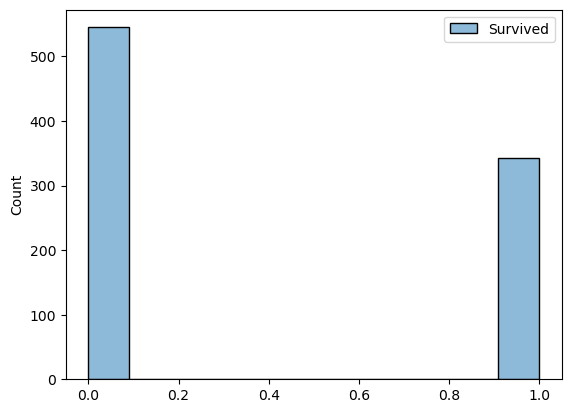

In [68]:
sns.histplot(pd.DataFrame(data, columns = ['Survived']))

<Axes: ylabel='Count'>

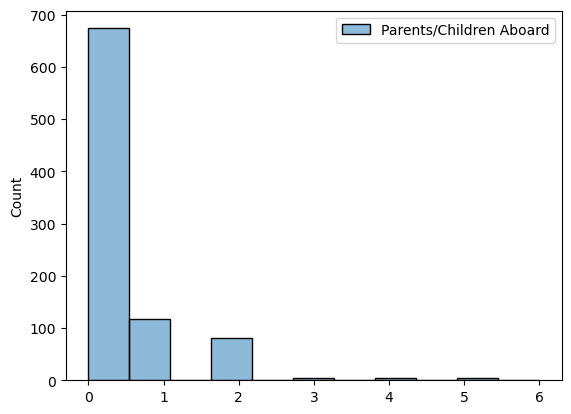

In [69]:
sns.histplot(pd.DataFrame(data, columns = ['Parents/Children Aboard']))

<Axes: ylabel='Count'>

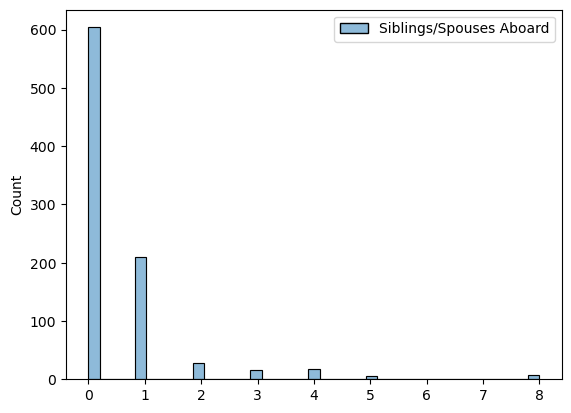

In [70]:
sns.histplot(pd.DataFrame(data, columns = ['Siblings/Spouses Aboard']))

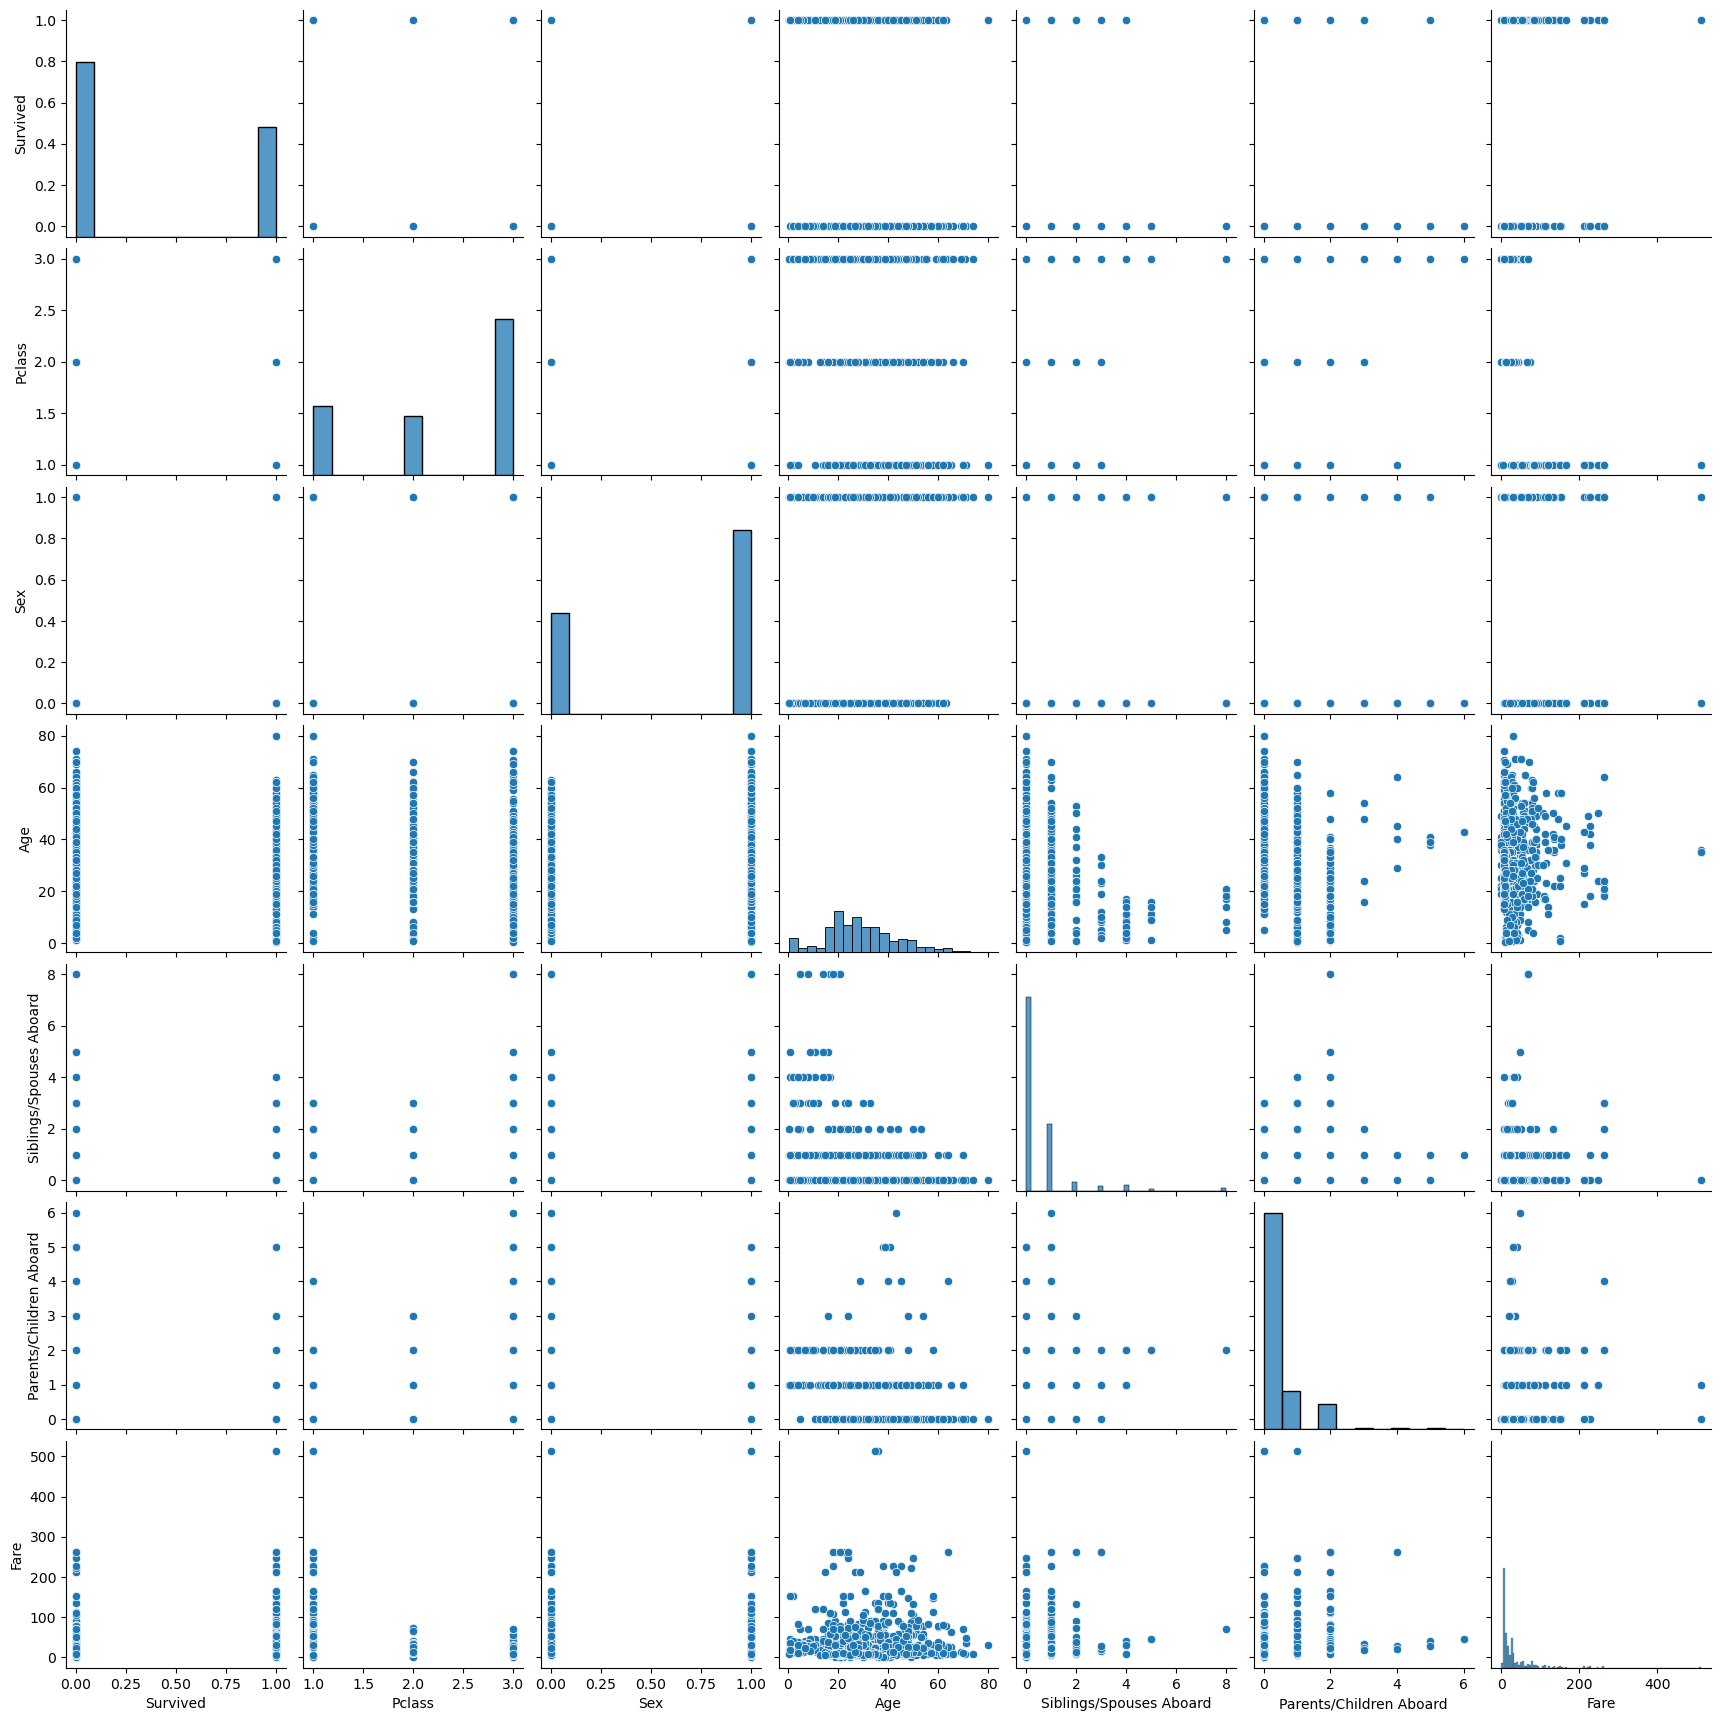

In [71]:
sns.pairplot(data, diag_kind='auto')

In [72]:
corr = data.corr()
corr

Survived    Pclass       Sex       Age  \
Survived                 1.000000 -0.336528 -0.542152 -0.059665   
Pclass                  -0.336528  1.000000  0.129507 -0.391492   
Sex                     -0.542152  0.129507  1.000000  0.091875   
Age                     -0.059665 -0.391492  0.091875  1.000000   
Siblings/Spouses Aboard -0.037082  0.085026 -0.113249 -0.297669   
Parents/Children Aboard  0.080097  0.020252 -0.244337 -0.193741   
Fare                     0.256179 -0.548919 -0.181137  0.112329   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                               -0.037082                 0.080097   
Pclass                                  0.085026                 0.020252   
Sex                                    -0.113249                -0.244337   
Age                                    -0.297669                -0.193741   
Siblings/Spouses Aboard                 1.000000                 0.414244   
Parents/Children Aboard                 0.414244                 1.000000   
Fare                                    0.158839                 0.215470   

                             Fare  
Survived                 0.256179  
Pclass                  -0.548919  
Sex                     -0.181137  
Age                      0.112329  
Siblings/Spouses Aboard  0.158839  
Parents/Children Aboard  0.215470  
Fare                     1.000000

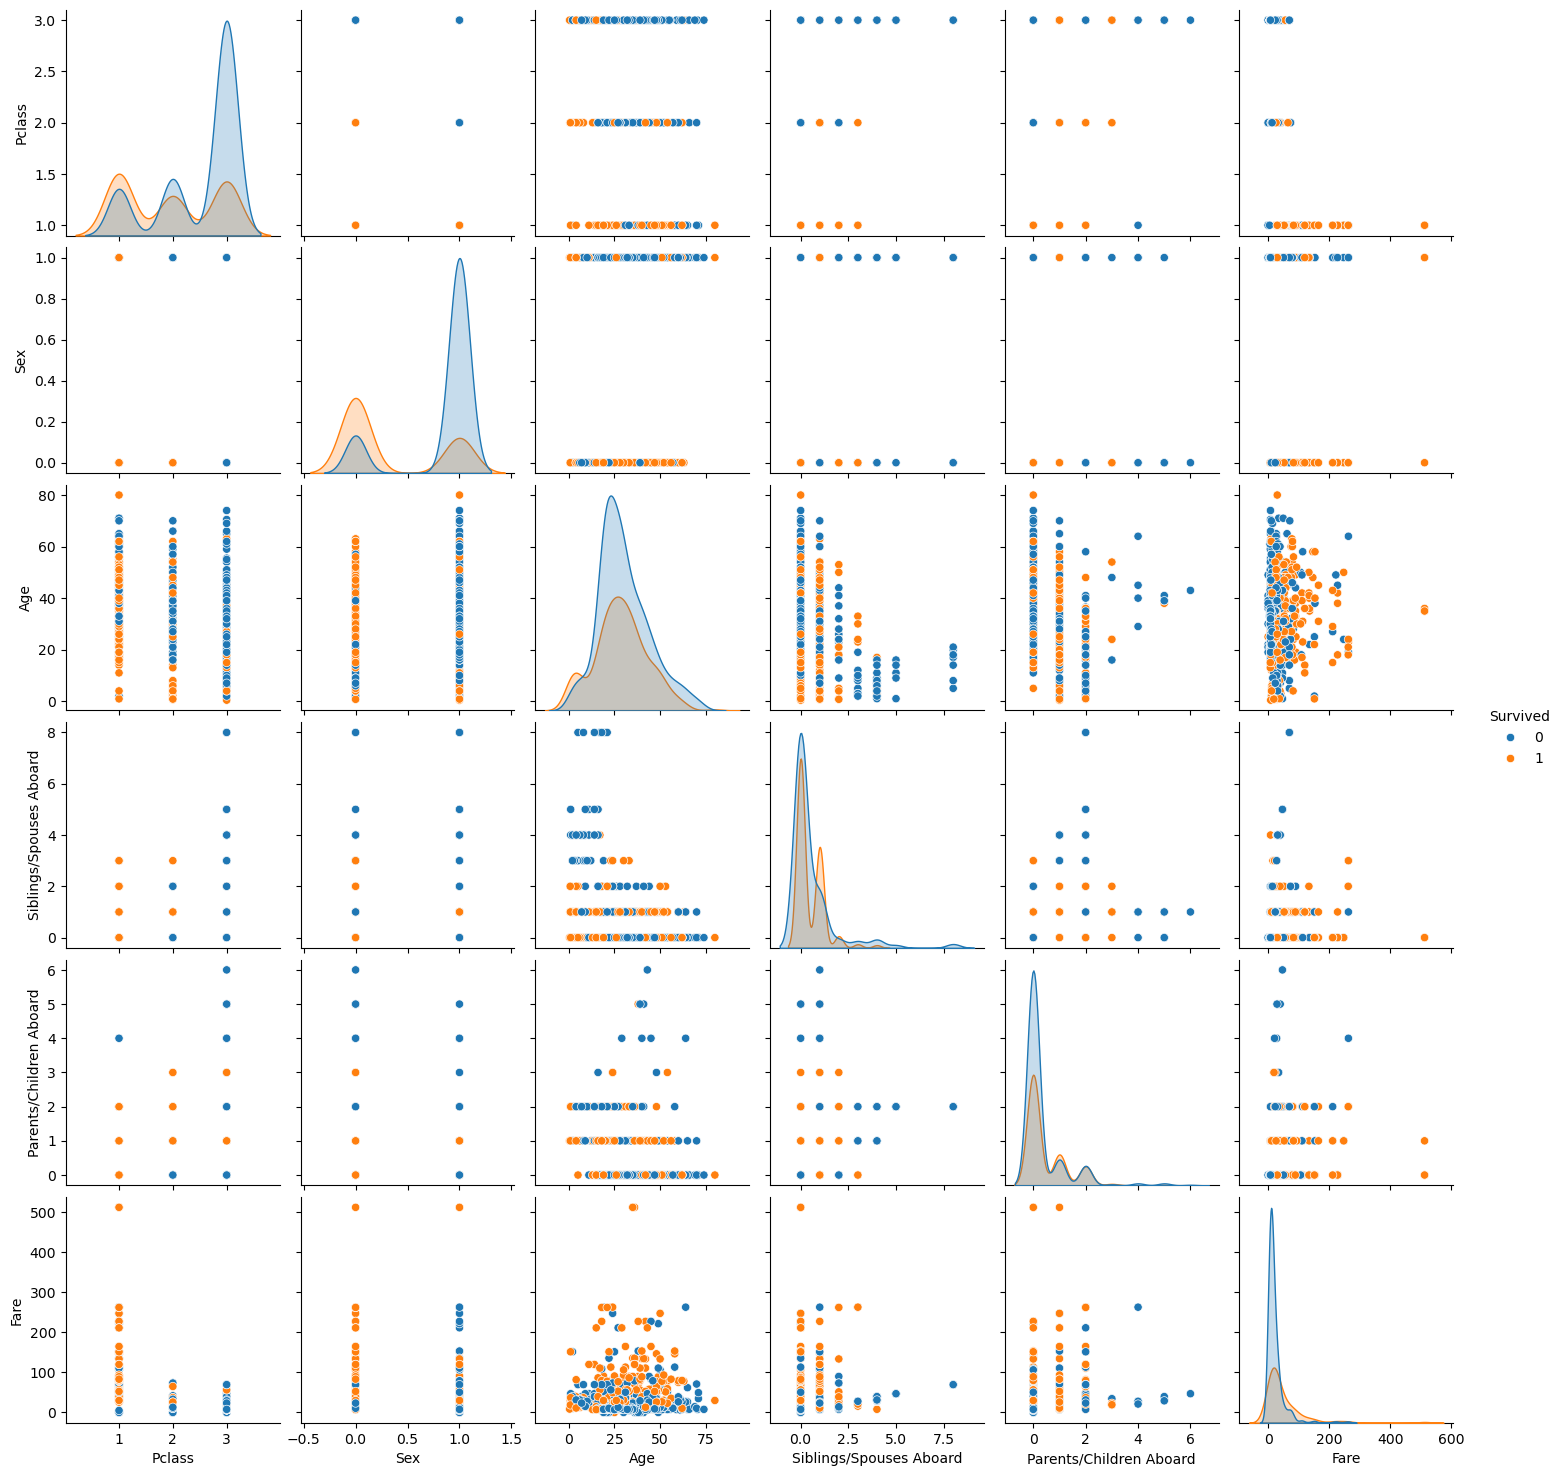

In [73]:
sns.pairplot(data, hue = 'Survived', diag_kind='kde')

<Axes: >

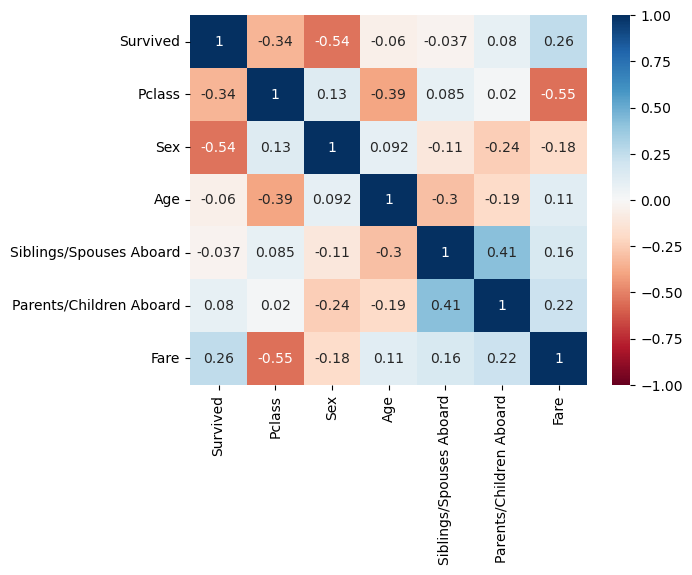

In [74]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Pre-Processing
1: Finish Major Preprocessing


Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).

2: Train your first model

3: Evaluate your model and compare training vs. test error

4: Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

5: Update your README.md to include your new work and updates you have all added. Make sure to upload all code and notebooks. Provide links in your README.md

6: Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

Please make sure preprocessing is complete and your first model has been trained. If you are doing supervised learning include example ground truth and predictions for train, validation and test. 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [76]:
scaler = MinMaxScaler()

In [77]:
datanorm = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [80]:
datanorm = datanorm[datanorm['Fare'] != 0.0]

In [81]:
datanorm.shape

(872, 7)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(datanorm.drop(['Survived'], axis=1), datanorm.Survived, test_size=0.2, random_state=21)

In [83]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [84]:
yhat_test = logreg.predict(X_test)
yhat_train = logreg.predict(X_train)

In [85]:
yhat_test

array([1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [86]:
yhat_train

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [87]:
logreg.score(X_test, y_test)

0.84

In [88]:
logreg.score(X_train, y_train)

0.7948350071736011

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       103
         1.0       0.88      0.71      0.78        72

    accuracy                           0.84       175
   macro avg       0.85      0.82      0.83       175
weighted avg       0.84      0.84      0.84       175



<Axes: >

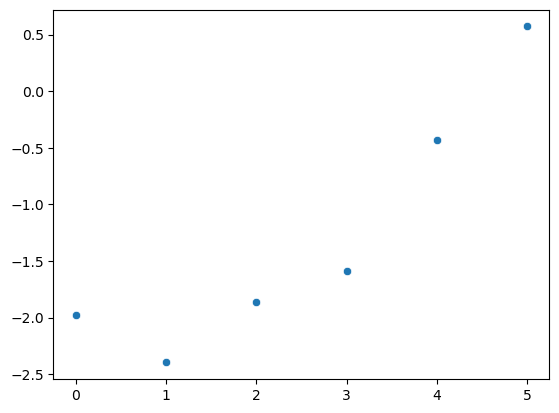

In [92]:
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

In [93]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [94]:
logreg.coef_[0]

array([-1.97387494, -2.39682697, -1.86003921, -1.58642663, -0.43394134,
        0.5721088 ])

<Axes: xlabel='Sex', ylabel='Survived'>

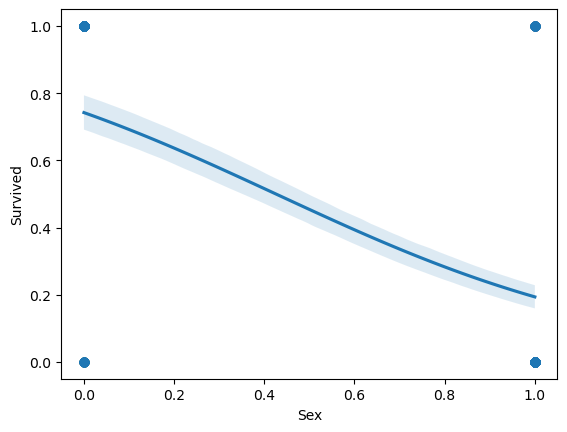

In [95]:
sns.regplot(x=datanorm['Sex'], y=datanorm['Survived'], data=datanorm, logistic=True)

In [97]:
datanorm.shape

(872, 7)

<Axes: xlabel='Pclass', ylabel='Survived'>

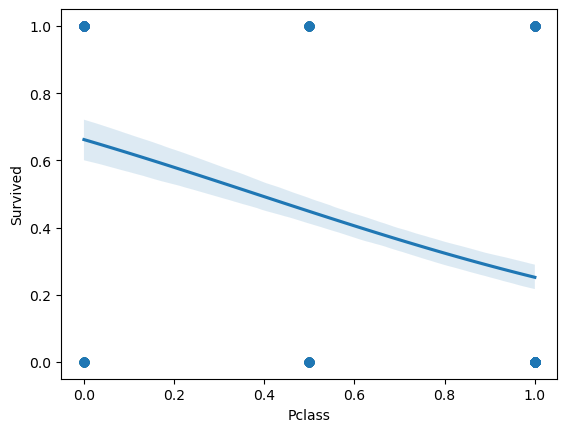

In [99]:
sns.regplot(x=datanorm['Pclass'], y=datanorm['Survived'], data=datanorm, logistic=True)

<Axes: xlabel='Age', ylabel='Survived'>

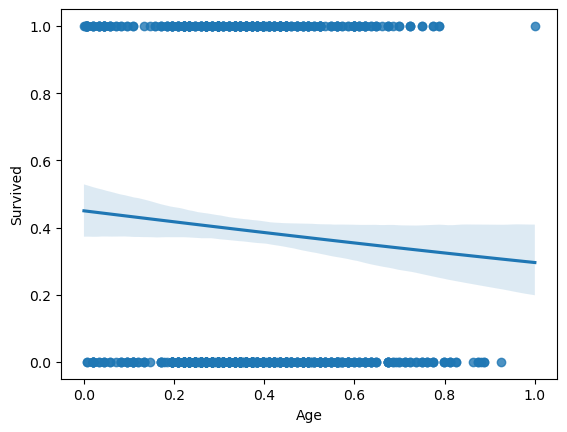

In [100]:
sns.regplot(x=datanorm['Age'], y=datanorm['Survived'], data=datanorm, logistic=True)